In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob


C:\Users\magshimim\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
NUM_OF_RECORDS_PER_SAMPLE = 5
def combine_rows(df):
    cols = df.columns
    df = df.groupby(df.index//NUM_OF_RECORDS_PER_SAMPLE)[cols].apply(lambda x: pd.DataFrame(x.values)).unstack().reset_index()
    df.columns = df.columns.droplevel()
    new_cols = ["index"]
    for col in cols:
        for i in range(NUM_OF_RECORDS_PER_SAMPLE):
            new_cols.append(col+str(i)) 
        
    df.columns = new_cols
    not_important_features = ["index"]
    features = ["Time","Frame ID","state_type","name","Hand Type","# hands"]
    for f in features:
        for s in new_cols:
            if f in s:
                df[f] = df[s]
                not_important_features.append(s)
    df = df.drop(not_important_features,axis=1)
    numeric_featers = [x for x in df.columns if x not in features]
    df[numeric_featers] = df[numeric_featers].apply(pd.to_numeric)
    return df

In [3]:
def get_state_type(filename):
    state_type = 3
    if 'Spontan' in filename:
        state_type = 1
    elif 'Sync' in filename:
        state_type = 2
    return state_type

def handle_right_hand_file(df):
    alone_right = pd.read_csv("HandRight.csv",index_col=None, header=0)
    alone_right.rename(columns=lambda x: x.strip(), inplace=True)
    alone_right["state_type"] = 3
    alone_right["name"] = ""
    #df = pd.concat([df,alone_right])
    return df

In [4]:
SKIP_MIN_NUM = 7
def construct_datasets(path_type):
    all_files = glob.glob(path_type)
    li = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        df.rename(columns=lambda x: x.strip(), inplace=True)
        
        df['state_type'] = get_state_type(filename)
        df['name'] = filename.split("\\")[1]
        start_time = df["Time"].min()
        df = df[df["Time"]>start_time+SKIP_MIN_NUM]
        df = combine_rows(df)
        df["Time"] = df["Time"].astype("float")
        df = df[df['state_type'].notna()]
        df["state_type"] = df["state_type"].astype("int")
        li.append(df)
        
    df = pd.concat(li, axis=0, ignore_index=True)
    df = handle_right_hand_file(df)
    
    return df
df = construct_datasets("Training/*/*.csv")
df

,Position X0,Position X1,Position X2,Position X3,Position X4,Position Y0,Position Y1,Position Y2,Position Y3,Position Y4,...,Pinch Strength1,Pinch Strength2,Pinch Strength3,Pinch Strength4,Time,Frame ID,state_type,name,Hand Type,# hands
0,-110.42230,137.58480,-110.69090,138.65750,-111.44740,231.4766,206.9182,233.3635,210.6163,236.8768,...,0.0,0.0,0.0,0.0,71.48033,98080,1,Evyatar Cohen,left,2
1,139.30040,-112.54570,139.50180,-113.14660,139.50440,214.3510,241.5983,218.3653,245.3283,222.8770,...,0.0,0.0,0.0,0.0,71.51359,98084,1,Evyatar Cohen,right,2
2,-113.91830,140.34820,-115.02970,142.05480,-115.33540,249.2464,227.4296,252.5950,233.2705,256.1827,...,0.0,0.0,0.0,0.0,71.56316,98090,1,Evyatar Cohen,left,2
3,144.09590,-114.90850,145.90060,-115.70580,148.04590,239.4014,259.3652,243.7470,261.6903,247.7996,...,0.0,0.0,0.0,0.0,71.59629,98094,1,Evyatar Cohen,right,2
4,-116.08190,148.85690,-117.53250,150.12540,-118.87450,262.2935,249.4935,265.2766,252.2394,269.4034,...,0.0,0.0,0.0,0.0,71.64600,98099,1,Evyatar Cohen,left,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60027,91.31541,-74.79743,92.07137,-75.16435,92.72672,182.4873,153.2910,184.3723,154.5737,185.6738,...,0.0,0.0,0.0,0.0,855.99660,67290,2,Yoel Raz,right,2
60028,-75.83507,93.94934,-76.47509,94.50477,-76.48546,159.3587,190.0024,163.2591,193.3147,165.9167,...,0.0,0.0,0.0,0.0,856.09640,67297,2,Yoel Raz,left,2
60029,94.64355,-76.36160,95.38348,-76.51263,96.97344,196.8384,167.8417,199.8574,171.0094,203.6819,...,0.0,0.0,0.0,0.0,856.16330,67302,2,Yoel Raz,right,2
60030,-77.62601,97.75611,-78.43058,98.93275,-79.84506,173.7391,205.9629,176.0170,208.3153,180.2403,...,0.0,0.0,0.0,0.0,856.26310,67309,2,Yoel Raz,left,2


# Labels


| Label | Description |
| --- | --- |
| 1 | Spontan |
| 2 | Sync |
| 3 | Alone |

In [5]:
df.sort_values('Time')
df['Time'].value_counts()

333.60600    2
737.55660    2
293.18770    2
347.99260    2
347.21410    2
            ..
70.95866     1
444.25310    1
407.09910    1
404.58470    1
388.23350    1
Name: Time, Length: 59753, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60032 entries, 0 to 60031
Data columns (total 96 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position X0      60032 non-null  float64
 1   Position X1      60032 non-null  float64
 2   Position X2      60032 non-null  float64
 3   Position X3      60032 non-null  float64
 4   Position X4      60032 non-null  float64
 5   Position Y0      60032 non-null  float64
 6   Position Y1      60032 non-null  float64
 7   Position Y2      60032 non-null  float64
 8   Position Y3      60032 non-null  float64
 9   Position Y4      60032 non-null  float64
 10  Position Z0      60032 non-null  float64
 11  Position Z1      60032 non-null  float64
 12  Position Z2      60032 non-null  float64
 13  Position Z3      60032 non-null  float64
 14  Position Z4      60032 non-null  float64
 15  Velocity X0      60032 non-null  float64
 16  Velocity X1      60032 non-null  float64
 17  Velocity X2 

In [7]:
import matplotlib.dates as matdates

def plot_position_over_time(position):
    print(position,"over time")
    for name in df["name"].dropna().unique()[:1]:#you can remove the [] to print for all persons
        print("plot position of",name)
        fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(20,10))
        for state_type in range(1,4):
            x_pos_over_timer = df[(df["name"]==name) & (df["state_type"]==state_type)][["Time",position,"Hand Type"]]
            left_x_pos_over_timer = x_pos_over_timer[x_pos_over_timer["Hand Type"]=="left"]
            right_x_pos_over_timer = x_pos_over_timer[x_pos_over_timer["Hand Type"]=="right"]
            ax[state_type-1][0].plot(left_x_pos_over_timer["Time"],left_x_pos_over_timer[position])
            ax[state_type-1][0].plot(right_x_pos_over_timer["Time"],right_x_pos_over_timer[position])
            ax[state_type-1][1].plot(left_x_pos_over_timer["Time"],left_x_pos_over_timer[position])
            ax[state_type-1][2].plot(right_x_pos_over_timer["Time"],right_x_pos_over_timer[position],"m")
        plt.show()

In [8]:
print(len(df[pd.isnull(df).any(axis=1)]))

0


# Models

In [15]:
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold
#like kfold but with equal distrabuted chunks
import warnings
#warnings.filterwarnings('ignore')

In [16]:
df = df.sample(frac=1).reset_index(drop=True)
df

,Position X0,Position X1,Position X2,Position X3,Position X4,Position Y0,Position Y1,Position Y2,Position Y3,Position Y4,...,Pinch Strength1,Pinch Strength2,Pinch Strength3,Pinch Strength4,Time,Frame ID,state_type,name,Hand Type,# hands
0,-137.29150,103.50910,-140.41080,103.93000,-140.65020,97.99437,124.8689,100.6654,125.2915,100.7271,...,0.0,0.128684,0.000000,0.164877,336.81000,39355,2,Yael Hagai,left,2
1,-167.58640,113.02940,-167.42830,113.97610,-166.51750,156.46280,147.9677,156.9333,148.0323,155.6866,...,0.0,1.000000,0.000000,1.000000,207.82990,24491,1,Yael Hagai,left,2
2,-144.74450,99.00000,-145.23550,99.50332,-146.75400,187.52730,165.3812,188.0126,165.9938,190.0144,...,0.0,0.000000,0.000000,0.000000,468.72850,54098,2,Oriya Social_Nuero,left,2
3,-110.12960,114.99930,-111.24680,115.35320,-112.11620,198.99190,206.4541,198.3343,206.5993,198.2175,...,0.0,0.000000,0.000000,0.000000,708.83980,82366,2,Revital Marbel,left,2
4,-17.21875,-20.18052,-22.76166,-25.56163,-25.05137,158.11880,155.2023,149.9693,145.1427,142.3348,...,1.0,0.845111,0.375161,0.000000,327.42490,38312,3,Orya Kalmanovitz,left,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60027,-102.46030,162.21360,-102.25730,162.74830,-102.33790,232.26030,283.5955,228.8729,289.0266,227.3795,...,0.0,0.000000,0.000000,0.000000,88.62683,100056,1,Evyatar Cohen,left,2
60028,-179.23980,136.14400,-176.00730,133.72320,-173.08370,150.36180,192.3356,146.2031,186.8874,142.9507,...,0.0,0.000000,0.000000,0.000000,403.78570,47247,2,Revital Marbel,left,2
60029,132.32650,-176.24170,129.07010,-175.39260,125.44050,121.40950,206.7901,119.4764,204.1561,119.3961,...,0.0,0.000000,0.000000,0.000000,659.42150,76679,2,Revital Marbel,right,2
60030,-74.04270,-74.20705,-74.43407,-74.28910,-75.67753,182.60910,182.9688,182.8647,181.3982,182.9318,...,0.0,0.000000,0.000000,0.000000,740.76780,57890,3,Yoel Raz,left,1


In [17]:
y = df["state_type"]
print(y.value_counts())
X = df.drop(["Frame ID","state_type","name","Hand Type","# hands"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

1    24385
2    24195
3    11452
Name: state_type, dtype: int64


In [97]:
knn = KNeighborsClassifier(n_neighbors=5,p=1,weights="distance")
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96      8041
           2       0.95      0.97      0.96      8016
           3       0.99      1.00      1.00      3754

    accuracy                           0.97     19811
   macro avg       0.97      0.97      0.97     19811
weighted avg       0.97      0.97      0.97     19811



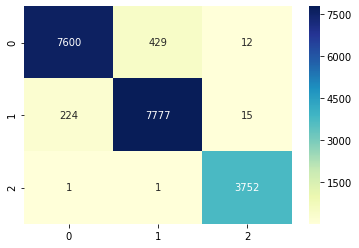

In [101]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), cmap="YlGnBu",annot=True, fmt="d")

In [13]:
def xgboost_model(X_train,X_test,y_train,y_test,verbose_eval=150):
    param_list = [("eta", 0.08), ("max_depth", 6), ("subsample", 0.8), ("colsample_bytree", 0.8), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("alpha", 7), ("lambda", 2), ("num_class", 4)]
    n_rounds = 300
    early_stopping = 50
    
    d_train = xgb.DMatrix(X_train, label=y_train)
    d_val = xgb.DMatrix(X_test, label=y_test)
    eval_list = [(d_train, "train"), (d_val, "validation")]
    bst = xgb.train(param_list, d_train, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping,verbose_eval=verbose_eval)
    d_test = xgb.DMatrix(data=X_test)
    y_pred = bst.predict(d_test)
    return y_pred

In [63]:
y_pred = xgboost_model(X_train,X_test,y_train,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      7941
           2       1.00      0.99      0.99      8114
           3       0.99      1.00      1.00      3756

    accuracy                           0.99     19811
   macro avg       0.99      1.00      0.99     19811
weighted avg       0.99      0.99      0.99     19811



In [142]:
def get_neural_network_model():
    model = Sequential()

    model.add(Dense(3, input_dim=len(X_train.columns), activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [145]:
np.random.seed(93)
model = get_neural_network_model()
model.fit(X_train, pd.get_dummies(y_train), epochs=10, validation_split=0.1,verbose=0)
_, test_acc = model.evaluate(X_test, pd.get_dummies(y_test),verbose=0)
print(test_acc)

Train on 36198 samples, validate on 4023 samples
Epoch 1/10
36198/36198 [==============================] - 2s 54us/step - loss: 1.1797 - accuracy: 0.4435 - val_loss: 0.8638 - val_accuracy: 0.5717
Epoch 2/10
36198/36198 [==============================] - 1s 40us/step - loss: 0.7484 - accuracy: 0.6251 - val_loss: 0.7054 - val_accuracy: 0.6324
Epoch 3/10
36198/36198 [==============================] - 1s 40us/step - loss: 0.6457 - accuracy: 0.6759 - val_loss: 0.6267 - val_accuracy: 0.6803
Epoch 4/10
36198/36198 [==============================] - 1s 40us/step - loss: 0.6090 - accuracy: 0.6901 - val_loss: 0.5842 - val_accuracy: 0.7236
Epoch 5/10
36198/36198 [==============================] - 2s 48us/step - loss: 0.5779 - accuracy: 0.7118 - val_loss: 0.5643 - val_accuracy: 0.7278
Epoch 6/10
36198/36198 [==============================] - 1s 40us/step - loss: 0.5593 - accuracy: 0.7292 - val_loss: 0.5533 - val_accuracy: 0.7452
Epoch 7/10
36198/36198 [==============================] - 1s 40us/ste

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=100)
rnd_clf = rnd_clf.fit(trainX,trainY)
y_pred = rnd_clf.predict(testX)
print(classification_report(testY, y_pred))

# Validation

In [102]:
test_df = construct_datasets("Validation/*/*.csv")
test_df = test_df.dropna()
y = test_df["state_type"]
X = test_df.drop(["Frame ID","state_type","name","Hand Type","# hands"], axis=1)

In [103]:
scores = cross_val_score(knn, X, y, cv=5)
print(scores.mean())

0.8816487848986263


In [148]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=93)
cvscores = []
for train, test in kfold.split(X, y):
    model = get_neural_network_model()
    model.fit(X.iloc[train], pd.get_dummies(y[train]), epochs=10,verbose=0)
    scores = model.evaluate(X.iloc[test], pd.get_dummies(y[test]), verbose=0)
    cvscores.append(scores[1] * 100)
print(cvscores)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/10
54027/54027 [==============================] - 2s 39us/step - loss: 0.8985 - accuracy: 0.5901
Epoch 2/10
54027/54027 [==============================] - 3s 47us/step - loss: 0.5813 - accuracy: 0.7071
Epoch 3/10
54027/54027 [==============================] - 2s 43us/step - loss: 0.5051 - accuracy: 0.7734
Epoch 4/10
54027/54027 [==============================] - 3s 57us/step - loss: 0.4791 - accuracy: 0.7866
Epoch 5/10
54027/54027 [==============================] - 3s 55us/step - loss: 0.4639 - accuracy: 0.7944
Epoch 6/10
54027/54027 [==============================] - 2s 39us/step - loss: 0.4523 - accuracy: 0.8059
Epoch 7/10
54027/54027 [==============================] - 2s 46us/step - loss: 0.4467 - accuracy: 0.8057
Epoch 8/10
 2048/54027 [>.............................] - ETA: 1:03 - loss: 0.4357 - accuracy: 0.8062

C:\Users\magshimim\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103001). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


54027/54027 [==============================] - 8s 140us/step - loss: 0.4425 - accuracy: 0.8110
Epoch 9/10
54027/54027 [==============================] - 3s 54us/step - loss: 0.4414 - accuracy: 0.8099
Epoch 10/10
54027/54027 [==============================] - 2s 46us/step - loss: 0.4424 - accuracy: 0.8105
accuracy: 80.40%
Epoch 1/10
54027/54027 [==============================] - 2s 46us/step - loss: 1.0359 - accuracy: 0.5384
Epoch 2/10
54027/54027 [==============================] - 3s 49us/step - loss: 0.6358 - accuracy: 0.6334
Epoch 3/10
54027/54027 [==============================] - 3s 47us/step - loss: 0.5887 - accuracy: 0.6921
Epoch 4/10
54027/54027 [==============================] - 3s 63us/step - loss: 0.5673 - accuracy: 0.7091
Epoch 5/10
54027/54027 [==============================] - 3s 60us/step - loss: 0.5470 - accuracy: 0.7267
Epoch 6/10
54027/54027 [==============================] - 3s 56us/step - loss: 0.5210 - accuracy: 0.7416
Epoch 7/10
54027/54027 [=======================

In [ ]:
kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=93)
cvscores = []
for train, test in kfold.split(X, y):
    y_pred = xgboost_model(X_train=X.iloc[train],X_test=X.iloc[test],y_train=y[train],y_test=y[test],verbose_eval=600)
    cvscores.append(accuracy_score(y[test],y_pred))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

[0]	train-merror:0.12371	validation-merror:0.12377
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[299]	train-merror:0.00076	validation-merror:0.00453
[0]	train-merror:0.12618	validation-merror:0.12725
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[299]	train-merror:0.00076	validation-merror:0.00506
[0]	train-merror:0.12792	validation-merror:0.12778
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[299]	train-merror:0.00063	validation-merror:0.00346
[0]	train-merror:0.10663	validation-merror:0.11847
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[